# Convolutional Neural Network

# Setup

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import np_utils

# Download Dataset

/Users/ishimototakara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


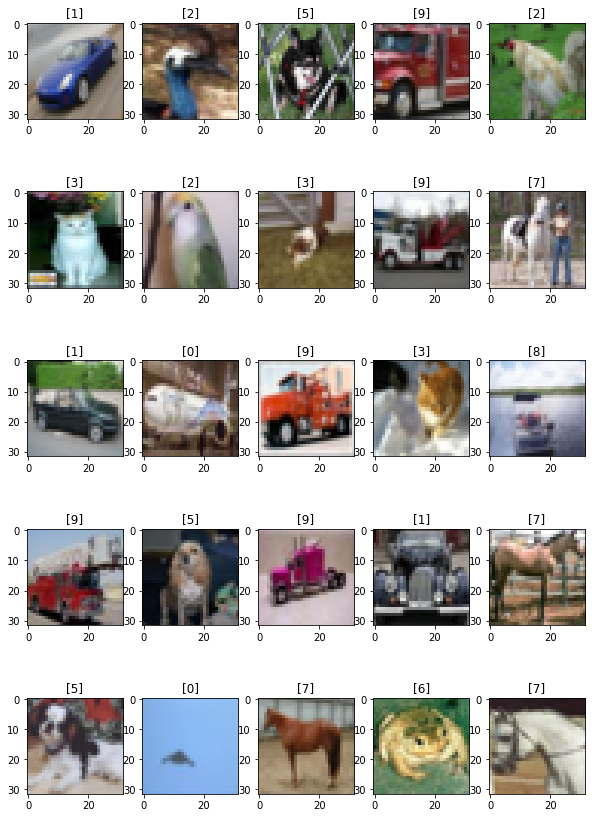

In [19]:
# cifar10：kerasのdatasetsで提供されている、ラベル付けされた5万枚の訓練画像と1万枚のテスト画像のデータセット
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#5x5枚の画像を表示する
plt.figure(figsize=(10,15))
for i in range(25):
    rand_num=np.random.randint(0,50000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    #x軸の目盛りを消す
    plt.tick_params(labelbottom='off')
    #y軸の目盛りを消す
    plt.tick_params(labelleft='off')
    #正解ラベルを表示
    plt.title(y_train[rand_num])


plt.show()

# Preprocess the image data

In [3]:
#画像を0-1の範囲で正規化
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#正解ラベルをOne-Hot表現に変換
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

# Define the CNN

In [6]:
#モデルを構築
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_split=0.1)

#モデルと重みを保存
json_string=model.to_json()
open('cifar10_cnn.json',"w").write(json_string)
model.save_weights('cifar10_cnn.h5')

#モデルの表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])


Epoch 1/20
352/352 [==============================] - 73s 205ms/step - loss: 1.6421 - accuracy: 0.4012 - val_loss: 1.2737 - val_accuracy: 0.5464
Epoch 2/20
352/352 [==============================] - 69s 196ms/step - loss: 1.1876 - accuracy: 0.5765 - val_loss: 0.9907 - val_accuracy: 0.6600
Epoch 3/20
352/352 [==============================] - 71s 203ms/step - loss: 1.0056 - accuracy: 0.6421 - val_loss: 0.8747 - val_accuracy: 0.6976
Epoch 4/20
352/352 [==============================] - 80s 227ms/step - loss: 0.8929 - accuracy: 0.6852 - val_loss: 0.7716 - val_accuracy: 0.7352
Epoch 5/20
352/352 [==============================] - 81s 232ms/step - loss: 0.8159 - accuracy: 0.7118 - val_loss: 0.7377 - val_accuracy: 0.7442
Epoch 6/20
352/352 [==============================] - 89s 254ms/step - loss: 0.7463 - accuracy: 0.7366 - val_loss: 0.7014 - val_accuracy: 0.7566
Epoch 7/20
352/352 [==============================] - 84s 239ms/step - loss: 0.6920 - accuracy: 0.7561 - val_loss: 0.7299 - val_ac

# モデルと重みをファイルに記録する
"cifar10_cnn.json"：モデルの記録されたファイル

"cifar10_cnn.h5"：重みの記録されたファイル

In [7]:
# モデルをjson形式のファイルで保存
json_string=model.to_json()
open('cifar10_cnn.json',"w").write(json_string)

# モデルの重みをh5形式で保存
model.save_weights('cifar10_cnn.h5')

## model.predict_classesを使って予測

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

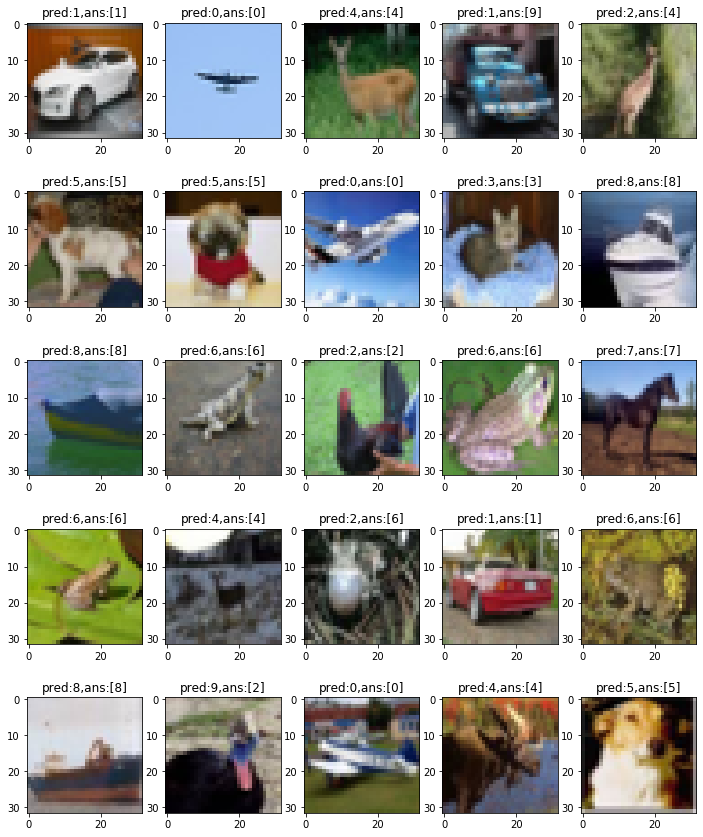

In [18]:
from keras.models import model_from_json

#cifar10をダウンロード
(_,_),(x_test_img,y_test_img)=cifar10.load_data()

#画像を0-1の範囲で正規化
x_test=x_test_img.astype('float32')/255.0

#正解ラベルをOne-Hot表現に変換
y_test=np_utils.to_categorical(y_test_img,10)

#学習済みのモデルと重みを読み込む
json_string=open('cifar10_cnn.json').read()
model=model_from_json(json_string)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('cifar10_cnn.h5')

#モデルを表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

#predict_classesで画像のクラスを予想する
predict_x=model.predict(x_test) 
img_pred=np.argmax(predict_x,axis=1)

#5x5枚の画像を表示する
plt.figure(figsize=(10,15))
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test_img[rand_num])
    #x軸の目盛りを消す
    plt.tick_params(labelbottom='off')
    #y軸の目盛りを消す
    plt.tick_params(labelleft='off')
    #画像の予想
    plt.title('pred:{0},ans:{1}'.format(img_pred[rand_num],y_test_img[rand_num]))


plt.show()